In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [151]:
df_data=pd.read_csv('Churn_Modelling.csv')

In [152]:
df_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [154]:
df_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [155]:
missing=df_data.isnull().sum()
missing

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Exited'>

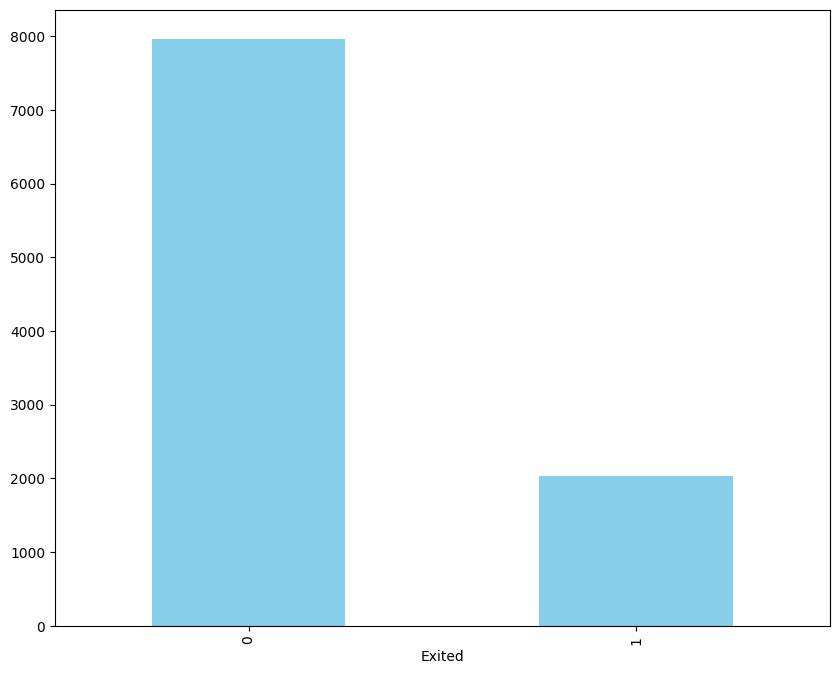

In [156]:
plt.figure(figsize=(10,8))
df_data['Exited'].value_counts().plot(kind='bar',color='skyblue')

<Axes: xlabel='Age'>

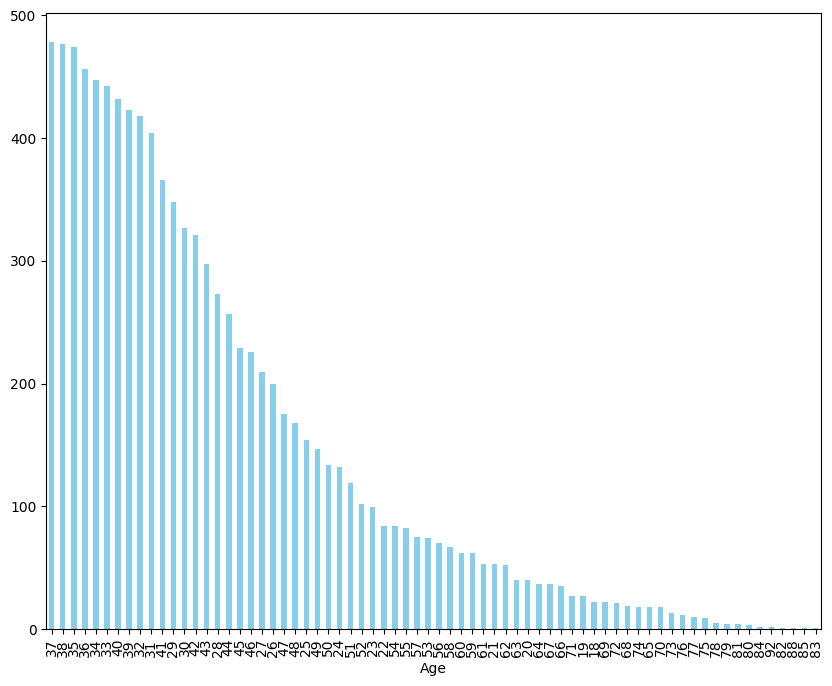

In [157]:
df_data['Age'].value_counts().plot(kind='bar',figsize=(10,8),color='skyblue')

In [158]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [159]:
col=['RowNumber','CustomerId','Surname']
df_data.drop(col,axis=1,inplace=True)


In [160]:
df_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [161]:
# convert all dtype in float
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['Geography','Gender']
for col in columns_to_convert_in_string_to_int:
    df_data[col] = label_encoder.fit_transform(df_data[col])
columns_to_convert_in_int_to_float = ['CreditScore','Geography','Gender', 'Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for col in columns_to_convert_in_int_to_float:
    df_data[col] = df_data[col].astype('float64')

In [162]:
df_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [163]:
x=df_data.drop('Exited',axis=1)
y=df_data['Exited']

In [164]:
scalar=StandardScaler()
x=scalar.fit_transform(x)

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [166]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [167]:
model=Sequential()

In [168]:
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [169]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['Accuracy'])

In [170]:
model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Accuracy: 0.5249 - loss: 0.6931 - val_Accuracy: 0.7987 - val_loss: 0.4746
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7936 - loss: 0.4668 - val_Accuracy: 0.8125 - val_loss: 0.4438
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8058 - loss: 0.4371 - val_Accuracy: 0.8206 - val_loss: 0.4305
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8089 - loss: 0.4394 - val_Accuracy: 0.8269 - val_loss: 0.4223
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8199 - loss: 0.4168 - val_Accuracy: 0.8256 - val_loss: 0.4138
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8260 - loss: 0.4107 - val_Accuracy: 0.8294 - val_loss: 0.4041
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8271 - loss: 0.4146 - val_Accuracy: 0.8425 - val_loss: 0.3942
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8354 - loss: 0.3992 - val_Accuracy: 0.

In [171]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [172]:
y_pred=model1.predict(x_test)

In [173]:
accuracy1=accuracy_score(y_test,y_pred)
print(f'accuracy:{accuracy1}')
classification_report1=classification_report(y_test,y_pred)
print(f'classification_report:{classification_report1}')

accuracy:0.8155
classification_report:              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [174]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [175]:
model2=GradientBoostingClassifier()
model2.fit(x_train,y_train)

GradientBoostingClassifier()

In [176]:
y_pred1=model2.predict(x_test)
accuracy2=accuracy_score(y_test,y_pred)
print(f'accuracy:{accuracy2}')
classification_report2=classification_report(y_test,y_pred)
print(f'classification_report:{classification_report2}')

accuracy:0.8155
classification_report:              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [177]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [178]:
ypred2=model3.predict(x_test)

In [179]:
accuracy3=accuracy_score(y_test,y_pred)
print(f'accuracy:{accuracy3}')
classification_report3=classification_report(y_test,y_pred)
print(f'classification_report:{classification_report3}')

accuracy:0.8155
classification_report:              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



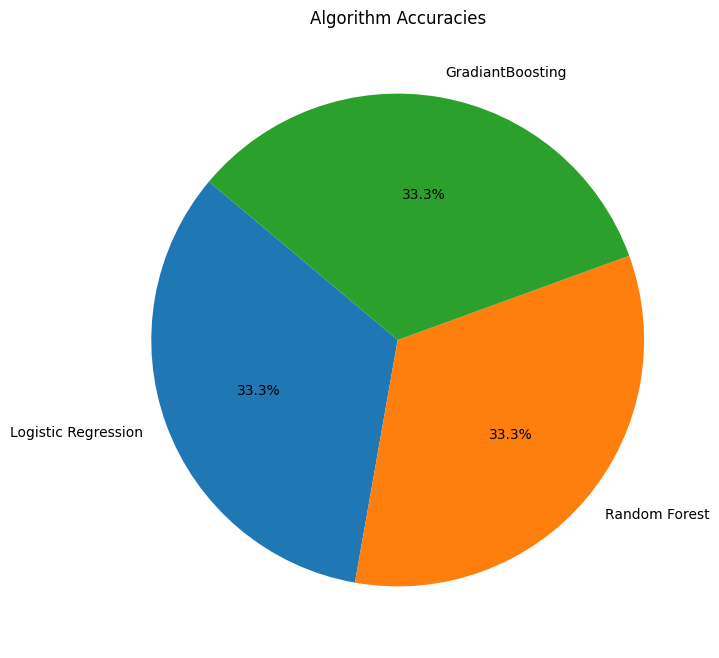

In [180]:
accuracies = [accuracy1, accuracy2 ,accuracy3]
algorithm_names = ['Logistic Regression', 'Random Forest', 'GradiantBoosting']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=algorithm_names, autopct='%1.1f%%', startangle=140)
plt.title('Algorithm Accuracies')
plt.show()